In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow

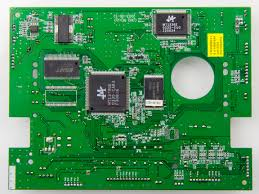

(194, 259, 3)

In [ ]:
pcb = cv2.imread('/content/gdrive/My Drive/pcb.jpeg')
cv2_imshow(pcb)
pcb.shape

In [ ]:
X = pcb.reshape((-1,3))
X.shape

(50246, 3)

In [ ]:
class Kmeans:
    def __init__(self,X,y,k,max_iter=1000):
        self.X = X
        self.y = y
        self.max_iter = max_iter
        self.k = k
    def initialize_centroids(self):
        idx = np.random.permutation(X.shape[0])
        centroids = X[idx[:self.k]]
        return centroids
    def compute_distance(self,X,centers):
        dist = np.zeros((X.shape[0],self.k))
        for i in range(self.k):
            for j in range(X.shape[0]):
                dist[j][i] = np.sqrt(np.sum(np.square(X[j]-centers[i])))
        return dist
    def get_centroid(self,X,labels):
        centroids = np.zeros((self.k,X.shape[1]))
        for i in range(self.k):
            centroids[i,:] = np.mean(X[labels==i,:],axis=0)
        return centroids
    def find_label(self,distances):
        return np.argmin(distances,axis=1)
    def metric(self,X,labels,centroids):
        m = []
        for i in range(self.k):
            sum = 0
            for j in (labels==i):
                sum+=np.sqrt(np.sum(np.square(X[j]-centroids[i])))
            m.append(sum/len(labels==i))
        return m

    def fit(self,X):
        centroids = self.initialize_centroids()
        for i in range(self.max_iter):
            old = centroids
            dist = self.compute_distance(self.X,old)
            self.labels = self.find_label(dist)
            centroids = self.get_centroid(X,self.labels)
            print('iteration{}: {}'.format(i,'done'))#format(i,self.metric(X,self.labels,centroids)))
            if np.all(old==centroids):
                break
        return centroids
    def predict(self,X,centroids):
        dist = self.compute_distance(X,centroids)
        return self.find_label(dist)

In [ ]:
from numpy.linalg import norm
k_algo = Kmeans(X,None,4)
centroids = k_algo.fit(X)

iteration0: done
iteration1: done
iteration2: done
iteration3: done
iteration4: done
iteration5: done
iteration6: done
iteration7: done
iteration8: done
iteration9: done
iteration10: done
iteration11: done
iteration12: done
iteration13: done
iteration14: done
iteration15: done
iteration16: done
iteration17: done
iteration18: done
iteration19: done
iteration20: done
iteration21: done
iteration22: done
iteration23: done
iteration24: done
iteration25: done
iteration26: done
iteration27: done
iteration28: done
iteration29: done
iteration30: done


In [ ]:
y_preds = k_algo.predict(X,centroids)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


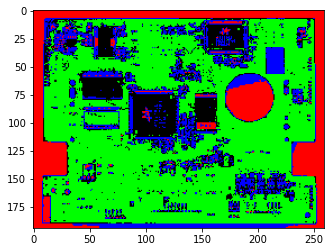

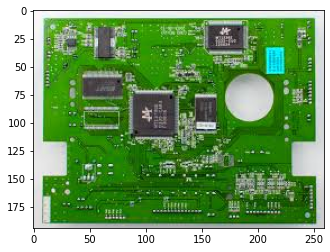

In [ ]:
import matplotlib.pyplot as plt
y_preds = y_preds.reshape((pcb.shape[0],pcb.shape[1]))
result = np.zeros((pcb.shape[0],pcb.shape[1],3))
color = {'1':(0,255,0),
         '2':(255,0,0),
         '3':(0,0,255),
         '4':(0,0,0)}
import random
for i in range(4):
    n = color[str(i+1)]
    result[y_preds==i] = n
plt.imshow(result)
plt.show()
plt.imshow(pcb)
plt.show()